# 머신러닝과 선형회귀

## 머신러닝이란?
- 경험 또는 학습을 통해서 결과를 개선해 나가는 것을 컴퓨터에 시키는 것 (지도학습에 국한된 내용)
- 머신러닝이 첫점과 끝점을 연결하는 방법 알아보기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 컬러로 출력하고 싶으면 True로 수정
g_color = False

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

Text(0.5, 1.0, 'D2')

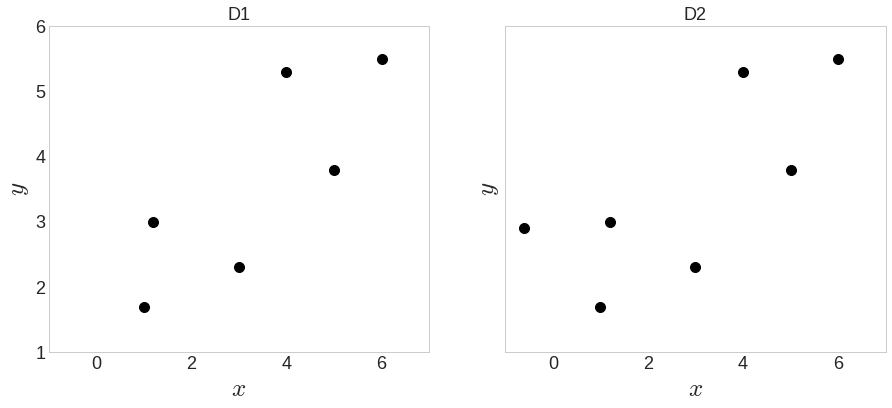

In [2]:
# 데이터를 두벌 마련합니다.
# D1은 앞서 예제로 들었던 최초 점 6개짜리 데이터입니다.
# D2는 D1에 제일 왼쪽점 하나가 더 추가된 데이터입니다.
D1 = np.array([[1.0, 1.2, 3, 4, 5, 6], [1.7, 3, 2.3, 5.3, 3.8, 5.5]])
D2 = np.array([[-0.6, 1.0, 1.2, 3, 4, 5, 6], [2.9, 1.7, 3, 2.3, 5.3, 3.8, 5.5]])


fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.set_title('D1', fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.set_title('D2', fontsize=18)

- 위의 데이터는 예시와 비슷한 모습
- 필요한 함수 정의

In [3]:
def machine_learning(D):
    """
    선형회귀 알고리즘을 사용하여 최적의 직선을 계산합니다.
    D : (2,N)의 어레이로 1행에는 데이터의 x좌표
        2행에는 데이터의 y좌표가 저장 되어 있습니다.
    """
    # 데이터의 개수를 N에 할당합니다.
    N = D.shape[1] 
    
    # 1열에 1, 2열에 데이터의 x좌표를 가지는 행렬을 만듭니다.
    # X: (N,2), y: (N,)
    X = np.c_[np.ones(N), D[0]] # np.c_ : 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만듦
    y = D[1]
    
    # 앞으로 배울 정규방정식을 풀어서 직선의 계수를 구합니다. / 연립방정식 해 풀기
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

def more_clever(D):
    """
    첫점과 끝점을 연결하는 직선을 계산합니다.
    D : (2,N)의 어레이로 1행에는 데이터의 x좌표
        2행에는 데이터의 y좌표가 저장 되어 있습니다.
    """
    first, last = D[:,0], D[:,-1]
    
    w1 = (last[1]-first[1]) / (last[0]-first[0])
    w0 = -w1*first[0] + first[1]
    
    return (w0, w1)
    
def f(x, w):
    """
    주어진 w를 사용하여 직선 f(x) = w[1]*x + w[0]의 값을 계산합니다.
    """
    return w[1]*x + w[0]

In [4]:
# D1에 대해서 w[1]*x + w[0]에서 w[0], w[1]을 구합니다. 
w_ml_d1 = machine_learning(D1)
w_mc_d1 = more_clever(D1)

# D2에 대해서 w[1]*x + w[0]에서 w[0], w[1]을 구합니다. 
w_ml_d2 = machine_learning(D2)
w_mc_d2 = more_clever(D2)

print(w_ml_d1)

[1.5108 0.6206]


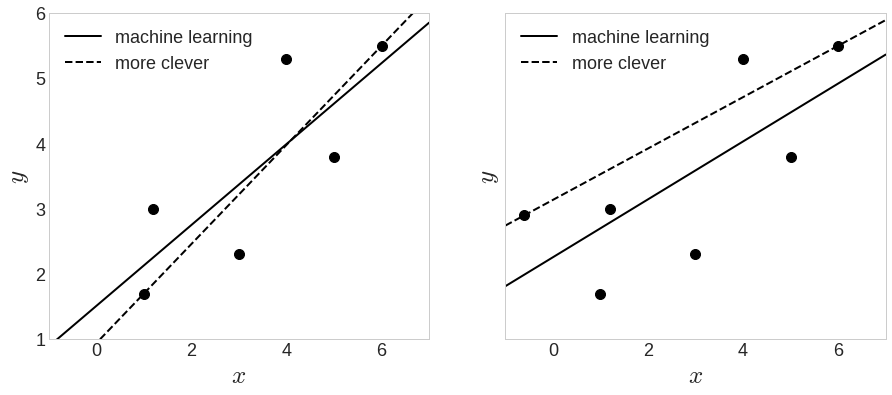

In [5]:
x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.plot(x, f(x, w_ml_d1), c='k', lw=2, label='machine learning')
ax1.plot(x, f(x, w_mc_d1), '--', c='k', lw=2, label='more clever')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.plot(x, f(x, w_ml_d2), c='k', lw=2, label='machine learning')
ax2.plot(x, f(x, w_mc_d2), '--', c='k', lw=2, label='more clever')
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.legend(fontsize=18)

- 왼쪽 그림은 두 방식 모두 적절히 동작
- 오른쪽그림은 머신러닝이 규칙기반 알고리즘보다 더 뛰어난 모습 (점과의 거리가 더 가까움)
- 머신러닝이 규칙기반 알고리즘보다 데이터에 대한 강인함과 범용성에 있어 더 뛰어남

### 입력과 출력의 관계
- 결과로 얻게 된 직선은 입력과 출력의 관계를 나타낸다고 볼 수 있음
- 입력과 출력의 관계가 직선모양일 것이라는 가정이 잘 맞는다면 오차는 허용할 만한 것
- 데이터로부터 획득된 직선을 가지고 있으면 입력-출력 관계가 없던 입력 구간에 대한 출력도 계산할 수 있음
- 선형회귀 작업을 통해 입력과 출력 관계를 찾아내고 예측까지 하는 것이 하고자 하는 일
- 즉, 머신러닝은 입력과 출력이 있을 때 숨어있는 입력과 출력의 관계를 찾는 과정

### 수학이 사용되는 순간
- 머신러닝에서 수학이 사용되는 순간들
1. 점과 선이 떨어진 정도 계산
    - 점위치와 선 위치 비교위해 좌표개념 필요 (점의 좌표, 직선 수식)
    - 입력은 숫자 두개, 출력은 숫자 한 개로 표현가능
    - 입력은 가중치, 가중치는 두 수를 묶어 벡터로 표현
    - 손실(loss) : 점과 선 사이의 수직거리들을 더한 총합

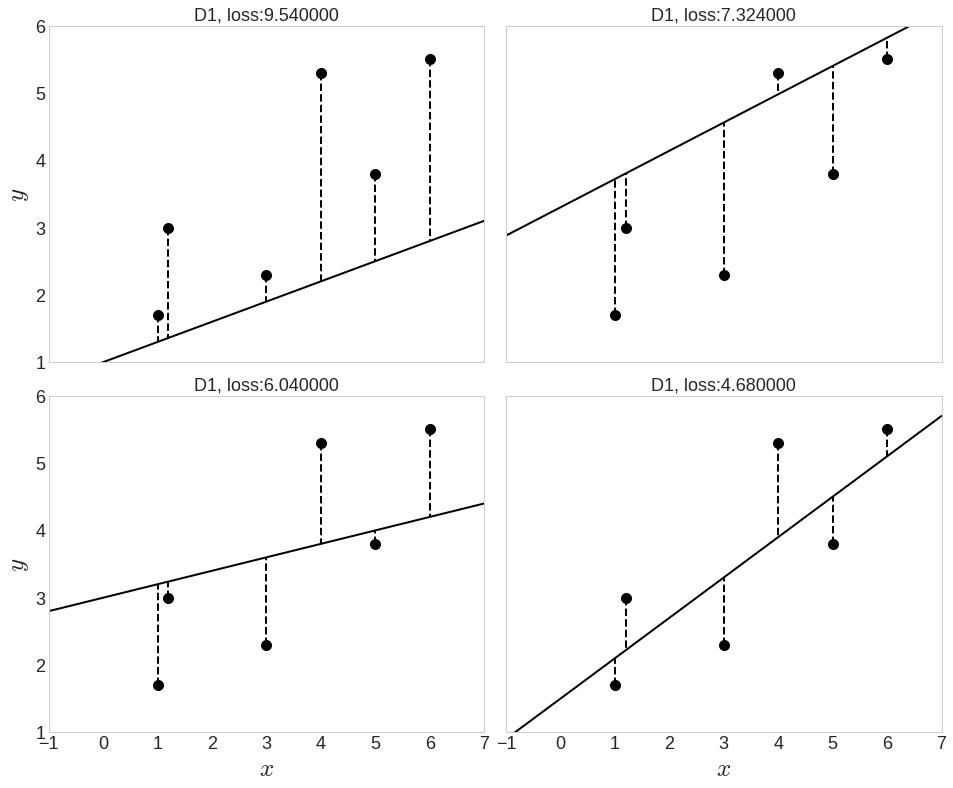

In [6]:
W = np.array([[1.0, 0.3],[3.3, 0.42],[3.0, 0.2],[1.5, 0.6]])

fig, ax = plt.subplots(2, 2, sharex='all', sharey='all')
fig.set_size_inches((16,13))

for j in range(W.shape[0]):
    w0, w1 = W[j,0], W[j,1]
    y=f(D1[0], [w0, w1])
    loss = 0.0
    
    ax[j // 2, j % 2].xaxis.set_tick_params(labelsize=18)
    ax[j // 2, j % 2].yaxis.set_tick_params(labelsize=18)
    ax[j // 2, j % 2].set_xlabel('$x$', fontsize=25)
    ax[j // 2, j % 2].set_ylabel('$y$', fontsize=25)
    ax[j // 2, j % 2].plot(x, f(x, [w0,w1]), c='k', lw=2, label='machine learning')
    ax[j // 2, j % 2].grid(False)
    
    for i in range(len(y)):
        loss+=np.abs(D1[1,i]-y[i])
        ax[j // 2, j % 2].plot([D1[0,i], D1[0,i]],[D1[1,i], y[i]],'k--')
        
    ax[j // 2, j % 2].plot(D1[0], D1[1], 'ko', markersize=10)
    ax[j // 2, j % 2].set_xlim([-1,7])
    ax[j // 2, j % 2].set_ylim([1,6])
    ax[j // 2, j % 2].set_title('D1, loss:{:f}'.format(loss), fontsize=18)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in ax.flat:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.1, wspace=0.05)

- 경사도벡터(gradient) : 항상 손실이 작아지도록 가중치를 변경해주는 안전장치
- gradient를 사용해 가중치 업데이트를 해가며 손실이 가장 작은 값을 찾음
- (예시) 15번 반복해 선을 그리며 최적의 선을 찾아가는 과정 (경사도벡터와 가중치 변화 추이 살펴보기 위해 150 -> 15번 반복)

첫 가중치 : [-0.4168 -0.0563]
경사도벡터: [ -4.2062 -16.4658]
[-0.3326  0.273 ]
경사도벡터: [ -3.0134 -11.3285]
[-0.2724  0.4996]
경사도벡터: [-2.1903 -7.7859]
[-0.2286  0.6553]
경사도벡터: [-1.6223 -5.3432]
[-0.1961  0.7622]
경사도벡터: [-1.23   -3.6588]
[-0.1715  0.8354]
경사도벡터: [-0.9591 -2.4973]
[-0.1523  0.8853]
경사도벡터: [-0.7717 -1.6965]
[-0.1369  0.9193]
경사도벡터: [-0.6421 -1.1444]
[-0.1241  0.9421]
경사도벡터: [-0.5522 -0.7638]
[-0.113   0.9574]
경사도벡터: [-0.4897 -0.5015]
[-0.1032  0.9674]
경사도벡터: [-0.4461 -0.3207]
[-0.0943  0.9739]
경사도벡터: [-0.4156 -0.1961]
[-0.086   0.9778]
경사도벡터: [-0.3941 -0.1103]
[-0.0781  0.98  ]
경사도벡터: [-0.3788 -0.0512]
[-0.0705  0.981 ]
경사도벡터: [-0.3678 -0.0106]
[-0.0632  0.9812]


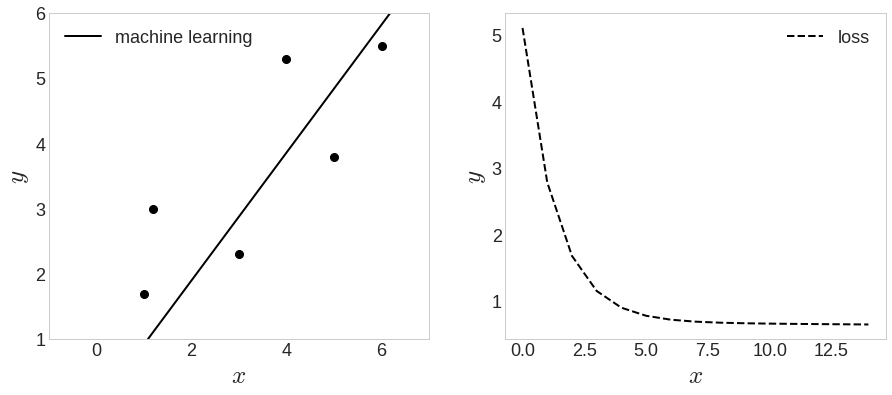

In [18]:
num_iters = 15
alpha = 0.02

np.random.seed(2)
w = np.random.randn(2) # 가중치 랜덤 초기화
N = D1.shape[1] 
print('첫 가중치 : {}'.format(w))

ws, L = [], []

# 1열에 1, 2열에 데이터의 x좌표를 가지는 행렬을 만듭니다.
# X: (N,2), y: (N,)
X = np.c_[np.ones(N), D1[0]]
y = D1[1]

# 여기서 우리의 경험 E를 반복하면서 태스크 T를 개선해 나간다.
for i in range(num_iters) :
    # grad L (경사도 벡터 구하기)
    c = (1/N) * np.dot(X.T, np.dot(X, w) - y)
    print('경사도벡터: {}'.format(c))
    # 안전장치 grad L을 이용해서 w를 수정한다.
    w -= alpha * c 
    print(w)
    # w가 변화되는 과정을 저장해둔다.
    ws.append(w)
    
    # 손실을 계산한다.
    L.append( ((np.dot(X, w) - y)**2).sum()/(2*N) )

x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)
    
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)
    
ax1.plot(D1[0], D1[1], 'ko', markersize=8)
ax1.plot(x, f(x, w), c='k', lw=2, label='machine learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(L[:50], '--', c='k', label='loss')
ax2.legend(fontsize=18)

- machine_learning() 함수로 얻은 결과와 비교해봤을 때, 조금 부족한 결과
- 반복을 더 많이 하면 좋은 결과 나올 수 있음 (항상 그런 것은 아님)

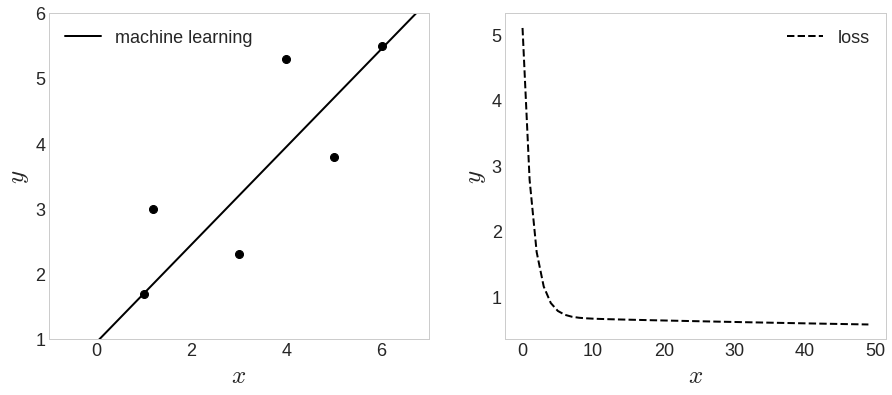

In [8]:
num_iters = 250 # 반복 150 -> 250번
alpha = 0.02

np.random.seed(2)
w = np.random.randn(2) # 가중치 랜덤 초기화
N = D1.shape[1] 

ws, L = [], []

# 1열에 1, 2열에 데이터의 x좌표를 가지는 행렬을 만듭니다.
# X: (N,2), y: (N,)
X = np.c_[np.ones(N), D1[0]]
y = D1[1]

# 여기서 우리의 경험 E를 반복하면서 태스크 T를 개선해 나간다.
for i in range(num_iters) :
    # grad L (경사도 벡터 구하기)
    c = (1/N) * np.dot(X.T, np.dot(X, w) - y) 
    # 안전장치 grad L을 이용해서 w를 수정한다.
    w -= alpha * c 
    # w가 변화되는 과정을 저장해둔다.
    ws.append(w)
    
    # 손실을 계산한다.
    L.append( ((np.dot(X, w) - y)**2).sum()/(2*N) )

x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)
    
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)
    
ax1.plot(D1[0], D1[1], 'ko', markersize=8)
ax1.plot(x, f(x, w), c='k', lw=2, label='machine learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(L[:50], '--', c='k', label='loss')
ax2.legend(fontsize=18)

- 미세하게 옳은 방향으로 변함
- 손실은 꾸준히 감소, gradient 정상 작동함

## 머신 러닝의 분류
- 모든 문제에 적용할 수 있는 알고리즘이 존재하지 않기 때문에, 머신러닝에는 여러 방법론이 존재
    - 지도학습 : 분류, 회귀 / 스팸메일 필터링, 이미지 분류, 주택가격 예측 등
    - 비지도학습 : 군집화, 차원축소 등
    - 강화학습
    
- 비지도 학습의 예시 (K-means clustering) : 입력데이터의 특성으로부터 유사도(similarity)를 계산하고 이를 기반으로 데이터끼리 그룹화

In [19]:
# github파
faithful = pd.read_csv('noviceml/faithful.csv')
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


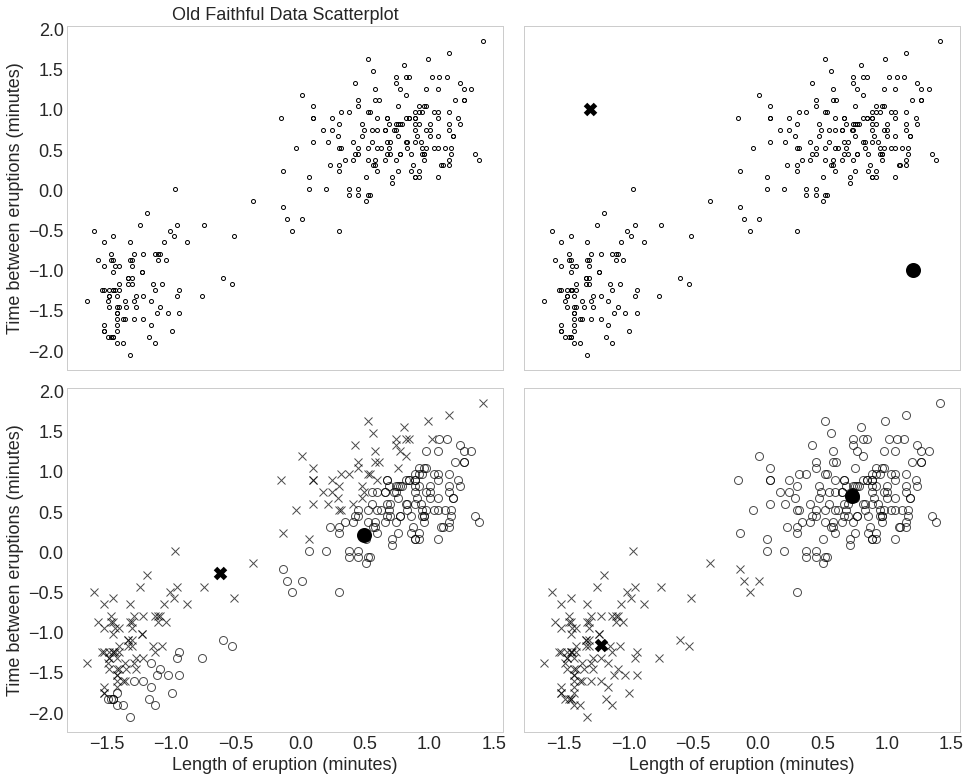

In [20]:
import pandas as pd

faithful = (faithful - faithful.mean()) / faithful.std()
faithful.columns = ['eruptions', 'waiting']

# fig, ax = plt.subplots(2, 2)
# fig.set_size_inches(15,10)

fig, ax = plt.subplots(2, 2, sharex='all', sharey='all')
fig.set_size_inches((16,13))

ax[0,0].plot(faithful.eruptions, faithful.waiting, 'k.',  fillstyle='none', markersize=8)
ax[0,0].set_title('Old Faithful Data Scatterplot', fontsize=18)
ax[0,0].xaxis.set_tick_params(labelsize=18)
ax[0,0].yaxis.set_tick_params(labelsize=18)
ax[0,0].set_xlabel('Length of eruption (minutes)', fontsize=18)
ax[0,0].set_ylabel('Time between eruptions (minutes)', fontsize=18)
ax[0,0].grid(False)

centroids = np.array([[-1.3, 1.0], [1.2, -1.0]])
ax[0,1].plot(faithful.eruptions, faithful.waiting, 'k.', fillstyle='none', markersize=8)
ax[0,1].plot(centroids[0,0], centroids[0,1], 'kx', markersize=10, markeredgewidth=5)
ax[0,1].plot(centroids[1,0], centroids[1,1], 'ko', markersize=10, markeredgewidth=5)
ax[0,1].xaxis.set_tick_params(labelsize=18)
ax[0,1].yaxis.set_tick_params(labelsize=18)
ax[0,1].set_xlabel('Length of eruption (minutes)', fontsize=18)
ax[0,1].set_ylabel('Time between eruptions (minutes)', fontsize=18)
ax[0,1].grid(False)

faith = np.array(faithful)
k = 2

# 클러스터링 과정을 5회 반복한다.
for i in range(2):
    # faith에 저장된 272개의 점에 대해 각각 점이 클러스터 0인지 클러스터 1인지를 기록하는 2차원 어레이
    # 아래처럼 272행 k(클러스터 수)열인 2차원 어레이
    #
    # rnk 어레이는 다음처럼 행번호에 해당하는 점이 열번호에 해당하는 묶음에 할당되면 1, 아니면 0으로 표시한다.
    #
    # rnk = [ [1, 0],      첫번째 점은 0번 묶음이다.
    #         [0, 1],      두번째 점은 1번 묶음이다.
    #         ...   ,
    #         ...   ,
    #         [1, 0] ]     272번째 점은 0번 묶음이다.
    #
    # 처음에는 모두 0으로 초기화
    rnk_row = faith.shape[0]
    rnk_col = k
    rnk = np.zeros( (rnk_row, rnk_col) )
    
    # 1) 모든 데이터에 대해서 초기 중심점과의 간격을 계산하여 더 가까운쪽의 묶음으로 데이터를 할당한다.
    # 각점이 어느 클러스터에 속하는지 rnk 어레이에 표시한다.
    for n in range(faith.shape[0]):
        # 각 데이터 포인트를 x에 받아와서
        x = faith[n]
        
        # 현재 중심점 2개 centroids[0]와 centroids[1]간의 거리를 구해서 비교한다.
        # 초기 중심점은 다음처럼 윗셀에서 초기화 했다.
        # centroids = np.array([[-1.3, 1.0], [1.2, -1.0]])
        # 각 중심점에서 x까지 거리를 구하는 법 : np.linalg.norm(x-centroids[0]), np.linalg.norm(x-centroids[1])
        dist_0 = np.linalg.norm(x-centroids[0])
        dist_1 = np.linalg.norm(x-centroids[1]) 
        if dist_0 < dist_1 :
            rnk[n,0] = 1
        else :
            rnk[n,1] = 1
    
    # 그림을 그리기위해 faith에 저장된 점데이터를 파랑과 빨강으로 분류 한다.
    # 앞서 만든 rnk 어레이의 상태에 따라 두 부분으로 나눈다.
    blue = faith[np.where(rnk[:,0]==1)]
    red  = faith[np.where(rnk[:,1]==1)]
    
    ##########################################################################################
    # 2) 위 작업이 완료되면 두 묶음으로 분리된 데이터의 평균점을 구한다.
    # 힌트 : 지금 두 묶음은 위의 blue, red 어레이에 각각 들어가 있고
    # blue 어레이에 저장된 점의 평균을 centroids[0]에 할당하고
    # red 어레이에 저장된 점의 평균을 centroids[1]에 할당한다.
    # 어레이의 평균을 구하기 위해서는 mean 함수를 사용한다.
    # mean함수 문서 : https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html
    centroids[0] = blue.mean(axis=0)
    centroids[1] = red.mean(axis=0)
    
    # 한번 반복 후 클러스터링 상황을 그린다.
    ax[1,i].plot(blue[:,0], blue[:,1],'kx', fillstyle='none', markersize=8, alpha=0.7)
    ax[1,i].plot(red[:,0],  red[:,1], 'ko', fillstyle='none', markersize=8, alpha=0.7) 
    ax[1,i].plot(centroids[0,0], centroids[0,1], 'kx', markersize=10, markeredgewidth=5)
    ax[1,i].plot(centroids[1,0], centroids[1,1], 'ko', markersize=10, markeredgewidth=5)   
    
    ax[1,i].xaxis.set_tick_params(labelsize=18)
    ax[1,i].yaxis.set_tick_params(labelsize=18)
    ax[1,i].set_xlabel('Length of eruption (minutes)', fontsize=18)
    ax[1,i].set_ylabel('Time between eruptions (minutes)', fontsize=18)
    ax[1,i].grid(False)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in ax.flat:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.05, wspace=0.05)

- 평균 군집화 알고리즘이 평면에 흩뿌려진 점들을 두 그룹으로 묶는 단계를 보여줌
- X와 O(검정동그라미)는 두 그룹으로부터 계산한 평균점
- 평균을 점점 개선해 나가는 머신러닝의 특성 알 수 있음

### 선 긋기 예제에서 알 수 있는 점
- 선 긋기 예제는 선을 주어진 점에 맞춘다는 의미로 보간(interpolation) 또는 근사(approximation)라고 이야기 함
    - 보간 : 모든 점을 다 지나가는 선을 찾음 (점과 점 사이에 빈 공간을 채운다는 의미)
    - 근사 : 점 근방을 지나가는 선을 찾음
- 단순 점들의 높이 값 평균을 직선으로 그린 그림의 예시

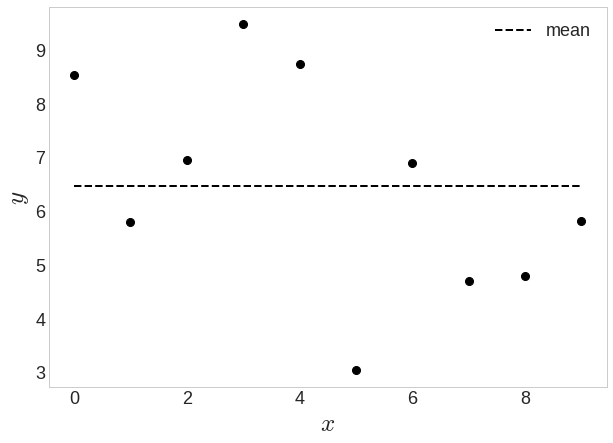

In [10]:
np.random.seed(0)
P = np.random.normal(loc=5.0, scale=2.0, size=10)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

plt.plot(P, 'ko', markersize=8)
plt.plot(np.arange(10), [P.mean()]*10, 'k--', label='mean')
plt.legend(fontsize=18)

- 선 찾기 작업은 주어진 점들이 보여주는 분포에서 평균을 찾는 과정으로 해석할 수 있음
- 점들이 특정 분포에서 발생한다고 가정하면 이 점들은 평균으로 회귀하는 성질 있음
- 따라서, 점들이 회귀하고자 하는 평균선을 찾는다고 하여 회귀라는 용어 사용 (비통계 분야에서는 fitting이라고 하기도 함)

## 왜 선형회귀를 배울까?
- 머신러닝의 좁은 의미로 관계 찾기도 있지만, 이에 해당되는 것만은 아님
- k-최근접 이웃(k-means neighbors) : 입력-출력 관계를 찾지 않고 주어진 데이터를 그대로 사용하는 알고리즘
    - 임의의 입력이 들어오면 가지고 있던 데이터 중에서 가장 비슷한 것을 k개 고름
    - k개의 평균한 값을 출력으로 돌려줌
    - k=1 이라면 입력과 가장 비슷한 데이터 하나 찾아서 돌려줌


- k-최근접 이웃의 예시

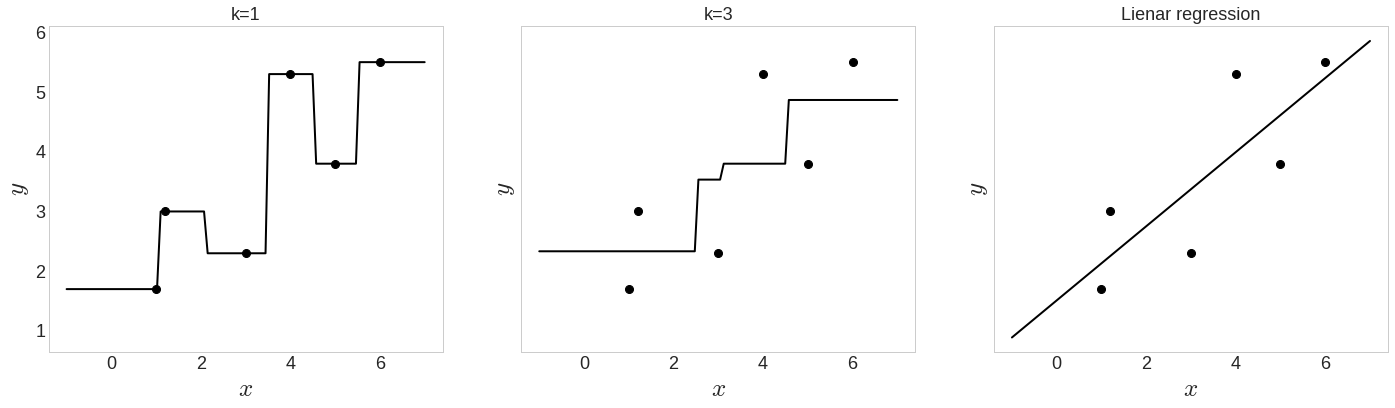

In [11]:
def dist(x1, x2):
    return np.abs(x1-x2)

def knn_point(D, p, k=3):
    return sorted(D, key=lambda e: dist(e[0], p) )[:k]

fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(24,6)

x = np.linspace(-1, 7, 100)

# knn
for i, k in enumerate([1, 3]):
    y_pred = []
    for p in x :
        ps = knn_point(D1.T, p, k)
        y_pred.append(np.asarray(ps)[:,1].mean())

    ax[i].plot(D1[0], D1[1], 'ko', markersize=8)    
    ax[i].plot(x, y_pred, c='k')
    ax[i].set_title("k={}".format(k), fontsize=18)
    ax[i].xaxis.set_tick_params(labelsize=18)
    ax[i].yaxis.set_tick_params(labelsize=18)
    ax[i].set_xlabel('$x$', fontsize=25)
    ax[i].set_ylabel('$y$', fontsize=25)
    ax[i].grid(False)
    
# linear regression
w_ml_d1 = machine_learning(D1)
ax[2].plot(D1[0], D1[1], 'ko', markersize=8) 
ax[2].plot(x, f(x, w_ml_d1), c='k', lw=2, label='machine learning')
ax[2].set_title('Lienar regression', fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=18)
ax[2].yaxis.set_tick_params(labelsize=18)
ax[2].set_xlabel('$x$', fontsize=25)
ax[2].set_ylabel('$y$', fontsize=25)
ax[2].grid(False)

- 굵은 점은 이미 가지고 있는 데이터, 직선은 -1에서 7까지 입력하면서 알고리즘이 만들어낸 출력
- k=1인 경우 기존 데이터의 y값만 출력
- 입력이 0이라면 0과 가장 가까운 점의 높이 값이 출력됨
- k=3인 경우, 데이터 존재 범위 내 상승하는 결과를 보여줌
    - 거친 계단식으로 그려져 전체적으로 정밀하다는 느낌은 없음
- 선형회귀의 경우, 입력-출력의 직선관계를 잘 표현하고 있음

### 선형회귀와 k-최근접 이웃의 차이
- 결정적인 차이는 모델을 설정하느냐 하지 않느냐의 여부
- 선형회귀 : 선긋기 예제에서 직선이라는 모델 선택해서 입력-출력 관계를 모델링 한 것
- k-최근접 이웃 : 모델이 없고 데이터 기반으로만 결과를 만들어 냄
- 두 알고리즘들이 '러닝' 하는 것
    - k-최근접 이웃 : 데이터를 적당한 장소에 저장하는 것
    - 선형회귀 : w1, w0 (가중치와 bias) = 알고리즘이 결정하는 요소들
    
### 로지스틱 회귀
- 분류를 위한 가장 기본적인 알고리즘
- 회귀과정 끝에 S자 곤선 함수가 더해진 형태
- 로지스틱회귀를 여러 단계로 묶으면 다층 퍼셉트론 (=딥러닝의 출발점)

### 선형회귀를 배우는 또 다른 이유
- 다항식과 다항식미분 사용하여 선형회귀 학습 가능
    - 이 학습과정에서 자연스럽게 모델설정, 경사도벡터, 최적화 개념 익힐 수 있음
    - 과대적합(overfitting), 규제(regularization) 개념 익힐 수 있음
    
## 손으로 직접해보는 선형회귀
- 직접 가중치들을 움직여 선형회귀 가능


https://metamath1.github.io/noviceml/linreg.html